In [1]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from hypothesis.distribution import MixtureOfNormals
from torch.distributions.normal import Normal

In [14]:
c0 = Normal(torch.tensor([-5.0]), torch.tensor([1.0]))
c1 = Normal(torch.tensor([0.0]), torch.tensor([1.0]))
c2 = Normal(torch.tensor([5.0]), torch.tensor([1.0]))
dist = MixtureOfNormals([c0, c1, c2], [0.4, 0.2, 0.4])

In [20]:
min_x = np.amin(-10)
max_x = np.amax(10)
x_range = np.linspace(float(min_x), float(max_x), 30000)

In [16]:
n_samples = 100000

In [17]:
samples = []
for i in range(n_samples):
    samples.append(dist.sample().item())

In [18]:
def log_likelihood(x):
    c0 = Normal(torch.tensor([-5.0]), torch.tensor([1.0]))
    c1 = Normal(torch.tensor([0.0]), torch.tensor([1.0]))
    c2 = Normal(torch.tensor([5.0]), torch.tensor([1.0]))
    dist = MixtureOfNormals([c0, c1, c2], [0.4, 0.2, 0.4])
    likelihood = dist.log_prob(x)

    return likelihood

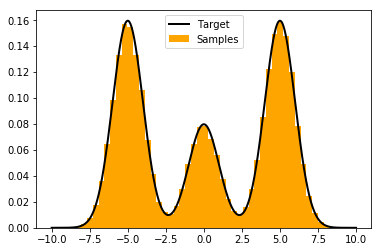

In [21]:
plt.plot(x_range, log_likelihood(torch.from_numpy(x_range).float()).exp().numpy(), lw=2, c='black', label='Target')
plt.hist(samples, bins=50, density=True, color='orange', label='Samples')
plt.legend()
plt.show()